# Lab 6: Exercise solutions

In [1]:
with open('../course/common.py') as fin:
    exec(fin.read())

In [2]:
with open('../course/matplotlibconf.py') as fin:
    exec(fin.read())

## Exercise 1

You've been hired by a shipping company to overhaul the way they route mail, parcels, and packages. They want to build an image recognition system capable of recognizing the digits in the zip code on a package automatically route it to the correct location.
You are tasked to build the digit recognition system. Luckily, you can rely on the MNIST dataset for the initial training of your model!

Build a deep convolutional Neural Network with at least two convolutional and two pooling layers before the fully connected layer:

- start from the network we have just built
- insert one more `Conv2D`, `MaxPooling2D` and `Activation` pancake. You will have to choose the number of filters in this convolutional layer
- retrain the model
- does performance improve?
- how many parameters does this new model have? More or less than the previous model? Why?
- how long did this second model take to train? Longer or shorter than the previous model? Why?
- did it perform better or worse than the previous model?

In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Activation
import tensorflow.keras.backend as K

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), kernel_initializer='normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [10]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=5, verbose=1, validation_split=0.3);

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 3s 82us/sample - loss: 0.3291 - accuracy: 0.9015 - val_loss: 0.1217 - val_accuracy: 0.9631
Epoch 2/5
42000/42000 [==============================] - 2s 45us/sample - loss: 0.0896 - accuracy: 0.9722 - val_loss: 0.0848 - val_accuracy: 0.9732
Epoch 3/5
42000/42000 [==============================] - 2s 45us/sample - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.0732 - val_accuracy: 0.9782
Epoch 4/5
42000/42000 [==============================] - 2s 45us/sample - loss: 0.0437 - accuracy: 0.9860 - val_loss: 0.0540 - val_accuracy: 0.9842
Epoch 5/5
42000/42000 [==============================] - 2s 45us/sample - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.0469 - val_accuracy: 0.9862


In [11]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.0342 - accuracy: 0.9881


[0.03416029700665386, 0.9881]

## Exercise 2

Pleased with your performance with the digits recognition task, your boss decides to challenge you with a harder task. Their online branch allows people to upload images to a website that generates and prints a postcard and ships it to its destination. Your boss would like to know what images people are loading on the site to provide targeted advertising on the same page, so he asks you to build an image recognition system capable of recognizing a few objects. Luckily for you, there's a dataset ready made with a collection of labeled images. This is the [Cifar 10 Dataset](http://www.cs.toronto.edu/~kriz/cifar.html), a very famous dataset that contains images for ten different categories:

- airplane                                         
- automobile                                         
- bird                                         
- cat                                         
- deer                                         
- dog                                         
- frog                                         
- horse                                         
- ship                                         
- truck

In this exercise, we will reach the limit of what you can achieve on your laptop. In later labs, we will learn how to leverage GPUs to speed up training.

Here's what you have to do:
- load the cifar10 dataset using `keras.datasets.cifar10.load_data()`
- display a few images, see how hard/easy it is for you to recognize an object with such low resolution
- check the shape of `X_train`, does it need reshaping?
- check the scale of `X_train`, does it need rescaling?
- check the shape of `y_train`, does it need reshaping?
- build a model with the following architecture, and choose the parameters and activation functions for each of the layers:
    - conv2d
    - conv2d
    - maxpool
    - conv2d
    - conv2d
    - maxpool
    - flatten
    - dense
    - output
- compile the model and check the number of parameters
- attempt to train the model with the optimizer of your choice. How fast does training proceed?
- If training is too slow, feel free to stop it and read ahead. In the next labs, you'll learn how to use GPUs to 

In [12]:
from tensorflow.keras.datasets import cifar10

In [13]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [14]:
X_train.shape

(50000, 32, 32, 3)

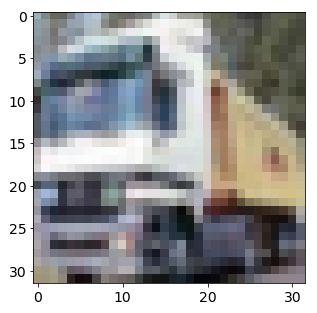

In [15]:
plt.imshow(X_train[1]);

In [16]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [17]:
y_train.shape

(50000, 1)

In [18]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [19]:
y_train_cat.shape

(50000, 10)

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 input_shape=(32, 32, 3),
                 kernel_initializer='normal',
                 activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu',
                 kernel_initializer='normal'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',
                 kernel_initializer='normal',
                 activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu',
                 kernel_initializer='normal'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [23]:
model.fit(X_train, y_train_cat,
          batch_size=256,
          epochs=2,
          validation_data=(X_test, y_test_cat),
          shuffle=True);

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 6s 125us/sample - loss: 1.8757 - accuracy: 0.3226 - val_loss: 1.7001 - val_accuracy: 0.3833
Epoch 2/2
50000/50000 [==============================] - 6s 112us/sample - loss: 1.4115 - accuracy: 0.4996 - val_loss: 1.3747 - val_accuracy: 0.5051
